# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
df = pd.read_csv('train.csv')

df.drop('dropoff_datetime', axis=1, inplace=True)

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2.0,2016-03-14 17:24:55,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1.0,2016-06-12 00:43:35,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2.0,2016-01-19 11:35:24,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2.0,2016-04-06 19:32:31,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2.0,2016-03-26 13:30:55,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0
...,...,...,...,...,...,...,...,...,...,...
76243,id2025009,1.0,2016-06-24 23:38:55,1.0,-74.003639,40.732281,-73.999725,40.745926,N,483.0
76244,id3864404,1.0,2016-04-13 07:31:56,2.0,-73.977577,40.742416,-73.987282,40.725262,N,394.0
76245,id3811807,1.0,2016-02-06 20:59:11,2.0,-73.987297,40.747337,-74.006462,40.721333,N,1016.0
76246,id3985061,2.0,2016-01-20 23:10:51,1.0,-73.961456,40.777191,-73.963158,40.798512,N,375.0


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

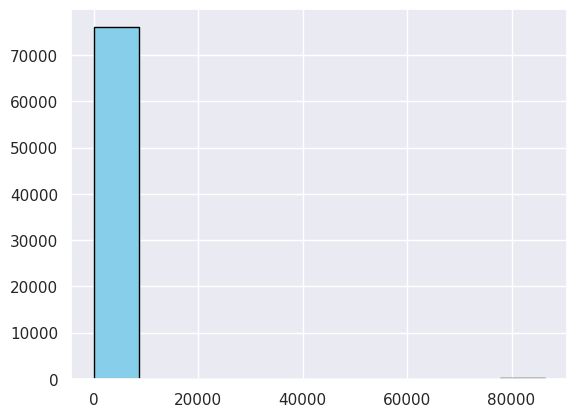

In [ ]:
df['trip_duration'].hist(color='skyblue', edgecolor='black')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

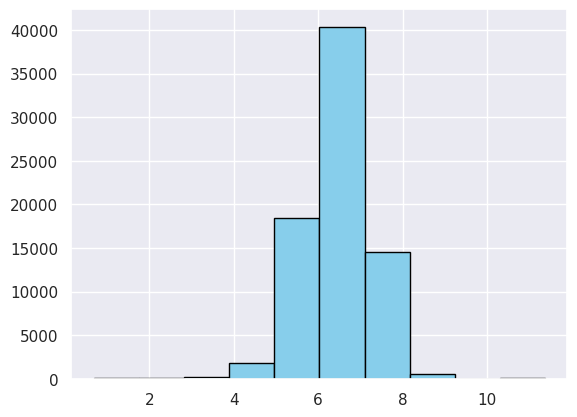

In [ ]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df.drop('trip_duration', axis=1, inplace=True)
df['log_trip_duration'].hist(color='skyblue', edgecolor='black')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

if df['log_trip_duration'].isnull().any():
    df = df.dropna(subset=['log_trip_duration'])

log1p_y_true = df['log_trip_duration'].values
best_const = np.mean(log1p_y_true)
log1p_y_pred = np.full_like(log1p_y_true, best_const)

rmsle_best_const = rmsle(log1p_y_true, log1p_y_pred)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7982248228063609


AssertionError: 

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

<ipython-input-9-43f80a338b7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_year'] = df['pickup_datetime'].dt.dayofyear


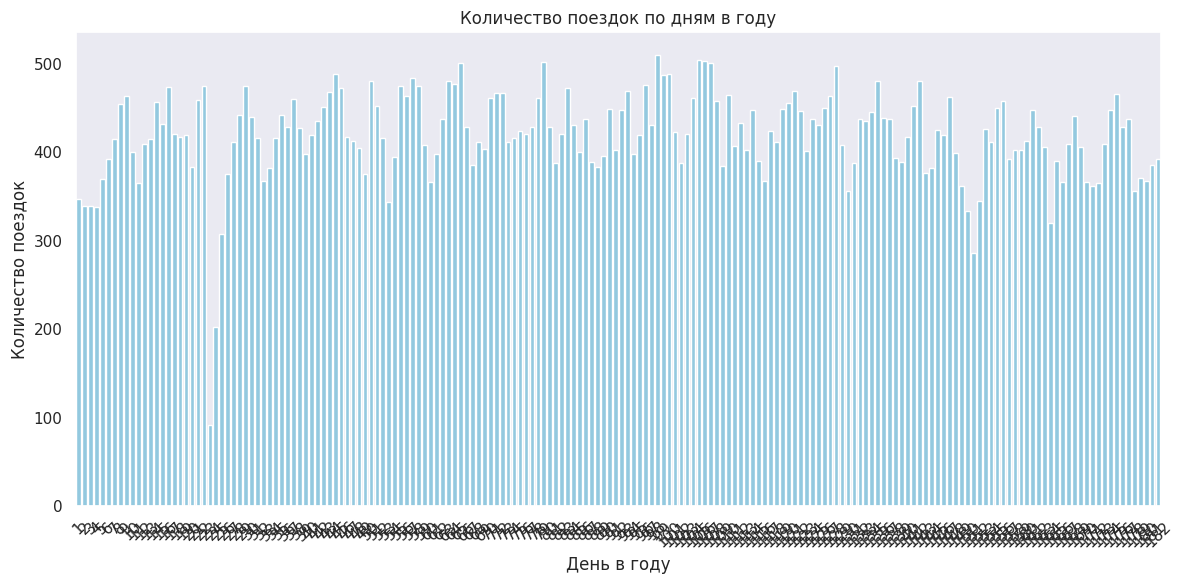

In [ ]:
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_year', color='skyblue')

plt.xlabel('День в году')
plt.ylabel('Количество поездок')
plt.title('Количество поездок по дням в году')
plt.xticks(rotation=45)  # Поворот подписей по оси x для лучшей читаемости
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

<ipython-input-10-7271fdaee110>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['pickup_datetime'].dt.day_name()
<ipython-input-10-7271fdaee110>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['pickup_datetime'].dt.hour


<Figure size 1200x600 with 0 Axes>

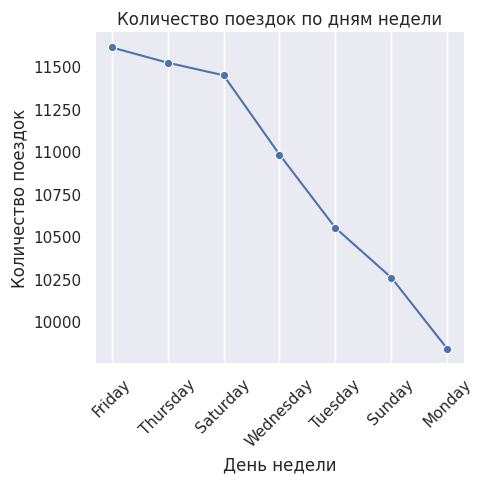

<Figure size 1200x600 with 0 Axes>

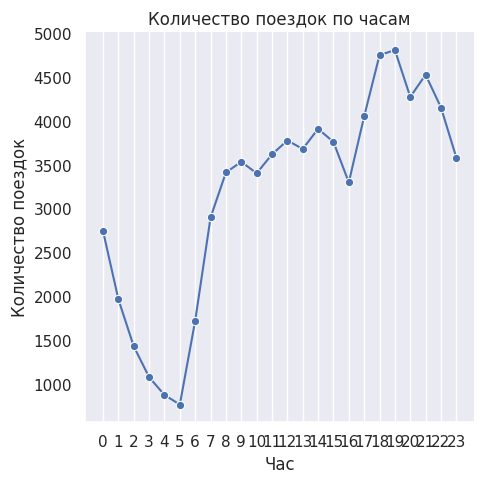

In [ ]:
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour


# Подсчет количества поездок по дням недели
day_counts = df['day_of_week'].value_counts().reset_index()
day_counts.columns = ['day_of_week', 'trip_count']

# Подсчет количества поездок по часам
hour_counts = df['hour'].value_counts().reset_index()
hour_counts.columns = ['hour', 'trip_count']

plt.figure(figsize=(12, 6))
sns.relplot(data=day_counts, x='day_of_week', y='trip_count', kind='line', marker='o')
plt.title('Количество поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.relplot(data=hour_counts.sort_values('hour'), x='hour', y='trip_count', kind='line', marker='o')
plt.title('Количество поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 24))  # Убедитесь, что ось x показывает все часы
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

<ipython-input-11-8e28e5fad3b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['pickup_datetime'].dt.hour
<ipython-input-11-8e28e5fad3b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['pickup_datetime'].dt.month_name()


<Figure size 1400x700 with 0 Axes>

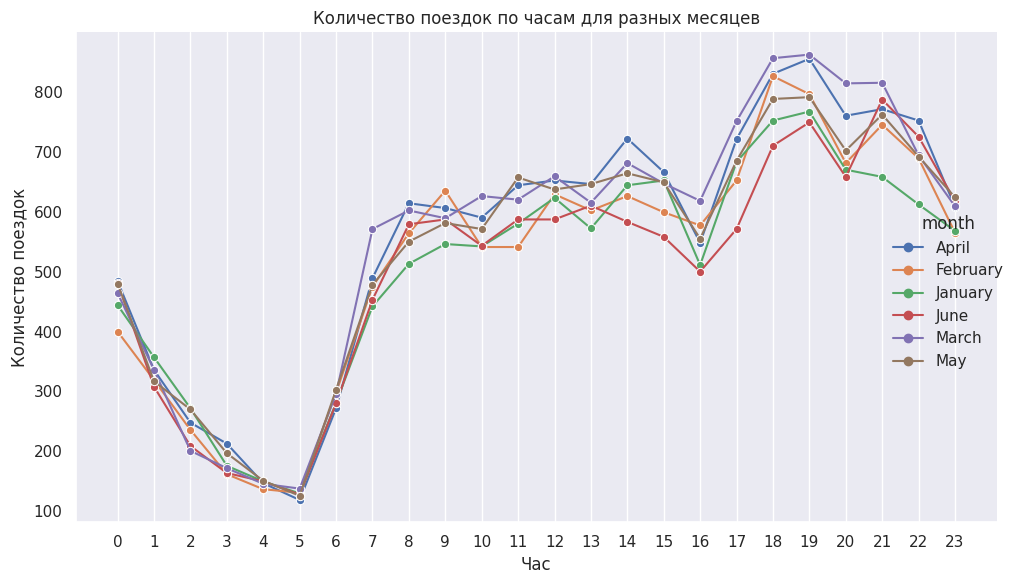

<ipython-input-11-8e28e5fad3b0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['pickup_datetime'].dt.day_name()


<Figure size 1400x700 with 0 Axes>

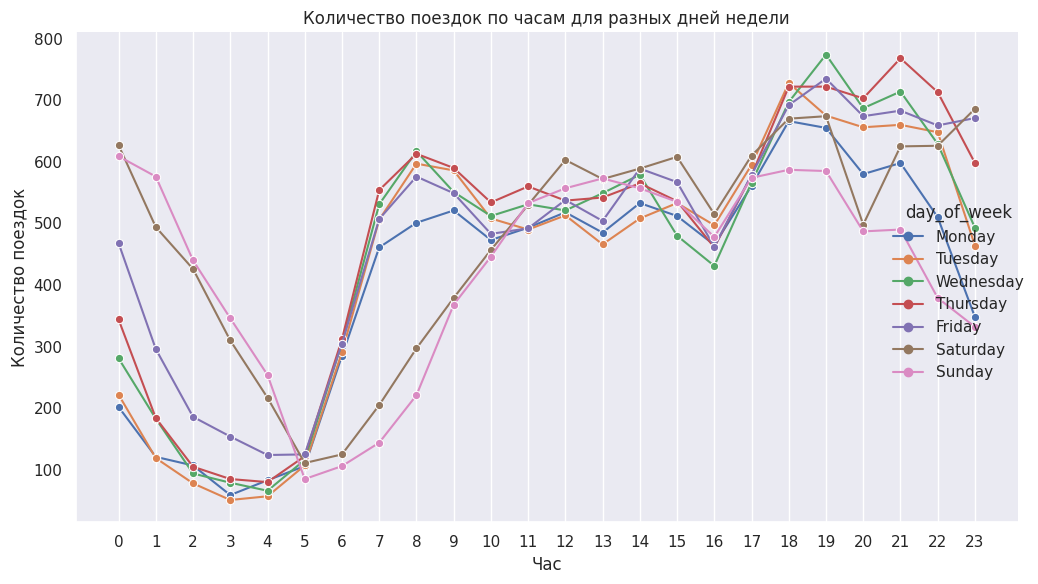

In [ ]:
df['hour'] = df['pickup_datetime'].dt.hour
df['month'] = df['pickup_datetime'].dt.month_name()

hour_month_counts = df.groupby(['hour', 'month']).size().reset_index(name='trip_count')

plt.figure(figsize=(14, 7))
sns.relplot(data=hour_month_counts, x='hour', y='trip_count', hue='month', kind='line', marker='o', height=6, aspect=1.5)
plt.title('Количество поездок по часам для разных месяцев')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 24))  # Убедитесь, что ось x показывает все часы
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df['day_of_week'] = df['pickup_datetime'].dt.day_name()

hour_weekday_counts = df.groupby(['hour', 'day_of_week']).size().reset_index(name='trip_count')

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_weekday_counts['day_of_week'] = pd.Categorical(hour_weekday_counts['day_of_week'], categories=days_order, ordered=True)

plt.figure(figsize=(14, 7))
sns.relplot(data=hour_weekday_counts, x='hour', y='trip_count', hue='day_of_week', kind='line', marker='o', height=6, aspect=1.5)
plt.title('Количество поездок по часам для разных дней недели')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 24))  # Убедитесь, что ось x показывает все часы
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

<ipython-input-12-87f8600f1420>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_log_duration_by_day, x='day_of_week', y='log_trip_duration', palette='coolwarm')


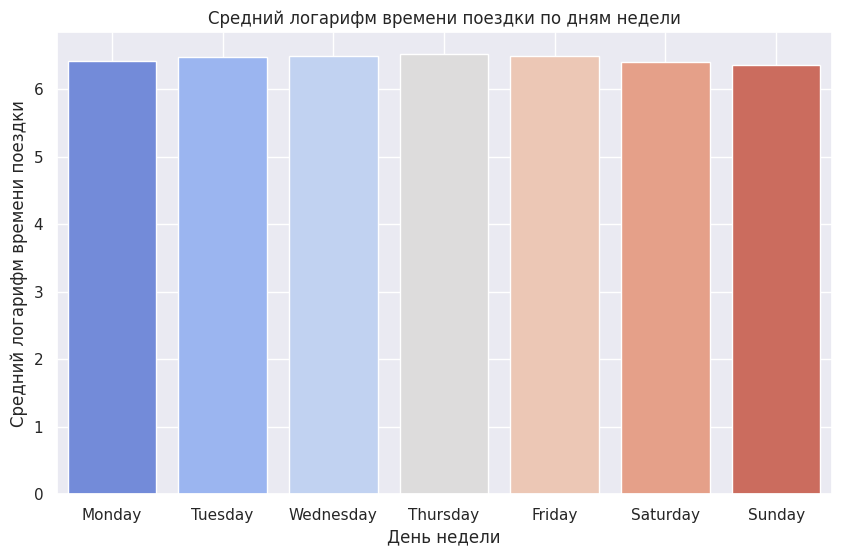

<ipython-input-12-87f8600f1420>:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=avg_log_duration_by_hour, x='hour', y='log_trip_duration', marker='o', palette='coolwarm')


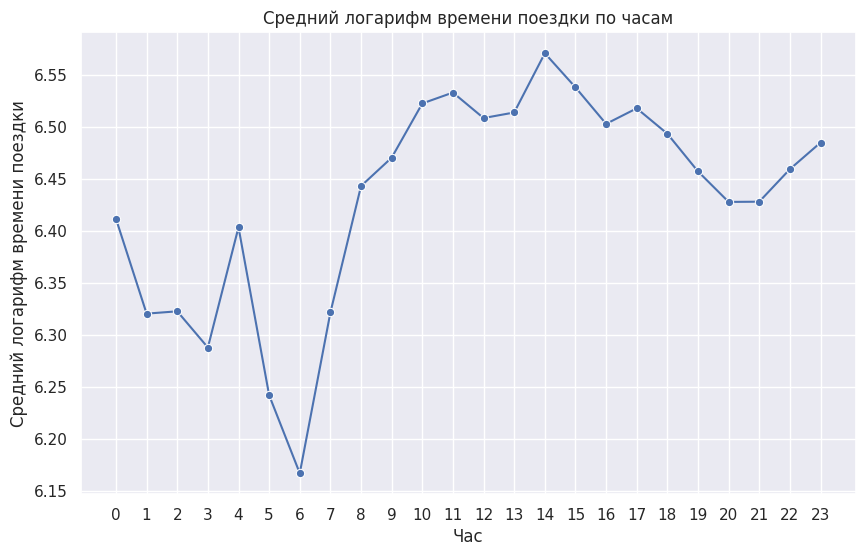

<ipython-input-12-87f8600f1420>:36: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=avg_log_duration_by_day_of_year, x='day_of_year', y='log_trip_duration', marker='o', palette='coolwarm')


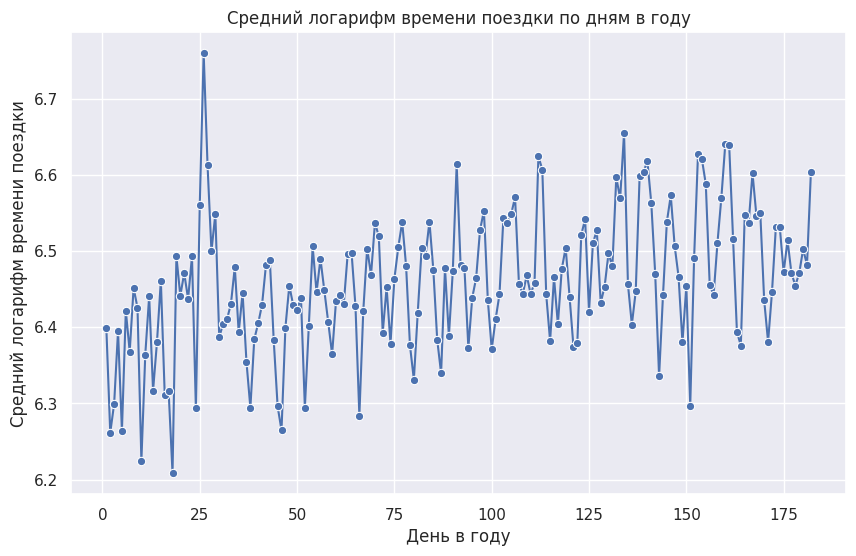

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

train['day_of_week'] = train['pickup_datetime'].dt.day_name()
train['hour'] = train['pickup_datetime'].dt.hour
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear

avg_log_duration_by_day = train.groupby('day_of_week')['log_trip_duration'].mean().reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_log_duration_by_day['day_of_week'] = pd.Categorical(avg_log_duration_by_day['day_of_week'], categories=days_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_log_duration_by_day, x='day_of_week', y='log_trip_duration', palette='coolwarm')
plt.title('Средний логарифм времени поездки по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм времени поездки')
plt.grid(True)
plt.show()

avg_log_duration_by_hour = train.groupby('hour')['log_trip_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_log_duration_by_hour, x='hour', y='log_trip_duration', marker='o', palette='coolwarm')
plt.title('Средний логарифм времени поездки по часам')
plt.xlabel('Час')
plt.ylabel('Средний логарифм времени поездки')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

avg_log_duration_by_day_of_year = train.groupby('day_of_year')['log_trip_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_log_duration_by_day_of_year, x='day_of_year', y='log_trip_duration', marker='o', palette='coolwarm')
plt.title('Средний логарифм времени поездки по дням в году')
plt.xlabel('День в году')
plt.ylabel('Средний логарифм времени поездки')
plt.grid(True)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

df['month'] = df['pickup_datetime'].dt.month

df['hour'] = df['pickup_datetime'].dt.hour

anomalous_period_1_start = '2016-01-24'
anomalous_period_1_end = '2016-01-29'

anomalous_period_2_start = '2016-05-28'
anomalous_period_2_end = '2016-05-30'

df['is_anomalous_period_1'] = df['pickup_datetime'].between(anomalous_period_1_start, anomalous_period_1_end)

df['is_anomalous_period_2'] = df['pickup_datetime'].between(anomalous_period_2_start, anomalous_period_2_end)

df['day_of_year'] = df['pickup_datetime'].dt.dayofyear  # От 1 до 365 (или 366 в високосный год)

print(df[['pickup_datetime', 'day_of_week', 'month', 'hour', 'is_anomalous_period_1', 'is_anomalous_period_2', 'day_of_year']].head())

      pickup_datetime day_of_week  month  hour  is_anomalous_period_1  \
0 2016-03-14 17:24:55      Monday      3    17                  False   
1 2016-06-12 00:43:35      Sunday      6     0                  False   
2 2016-01-19 11:35:24     Tuesday      1    11                  False   
3 2016-04-06 19:32:31   Wednesday      4    19                  False   
4 2016-03-26 13:30:55    Saturday      3    13                  False   

   is_anomalous_period_2  day_of_year  
0                  False           74  
1                  False          164  
2                  False           19  
3                  False           97  
4                  False           86  


<ipython-input-14-d78d5dc4e1c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['pickup_datetime'].dt.day_name()
<ipython-input-14-d78d5dc4e1c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['pickup_datetime'].dt.month
<ipython-input-14-d78d5dc4e1c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

v = df['log_trip_duration']
W = df[['day_of_week', 'month', 'hour', 'day_of_year', 'is_anomalous_period_1', 'is_anomalous_period_2']]

W_train, W_test, v_train, v_test = train_test_split(W, v, test_size=0.3, random_state=42)

categorical_features = ['day_of_week']
numeric_features = ['month', 'hour', 'day_of_year', 'is_anomalous_period_1', 'is_anomalous_period_2']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Масштабируем числовые признаки
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Кодируем категориальные признаки
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())  # Ridge-регрессия с параметрами по умолчанию
])

model.fit(W_train, v_train)

score = model.score(W_test, v_test)

print(f'R2 score на тестовой выборке: {score:.4f}')

R2 score на тестовой выборке: 0.0104


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
R = 6371.0

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

df['haversine'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

print(df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'haversine']])

       pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0            40.767937        -73.982155         40.765602         -73.964630   
1            40.738564        -73.980415         40.731152         -73.999481   
2            40.763939        -73.979027         40.710087         -74.005333   
3            40.719971        -74.010040         40.706718         -74.012268   
4            40.793209        -73.973053         40.782520         -73.972923   
...                ...               ...               ...                ...   
76242        40.738754        -73.999756         40.760963         -73.986588   
76243        40.732281        -74.003639         40.745926         -73.999725   
76244        40.742416        -73.977577         40.725262         -73.987282   
76245        40.747337        -73.987297         40.721333         -74.006462   
76246        40.777191        -73.961456         40.798512         -73.963158   

       haversine  
0       

<ipython-input-19-f5199b97c253>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['haversine'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [ ]:
df['log_haversine'] = np.log1p(df['haversine'])

print(df[['haversine', 'log_haversine']])

       haversine  log_haversine
0       1.498521       0.915699
1       1.805507       1.031584
2       6.385098       1.999464
3       1.485498       0.910473
4       1.188588       0.783257
...          ...            ...
76242   2.707238       1.310287
76243   1.552693       0.937149
76244   2.075386       1.123430
76245   3.311935       1.461387
76246   2.375037       1.216406

[76247 rows x 2 columns]


<ipython-input-20-aea6d977de8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_haversine'] = np.log1p(df['haversine'])


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

<ipython-input-25-6988fd8282d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration'] = np.expm1(df['log_trip_duration'])
<ipython-input-25-6988fd8282d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_speed'] = df['haversine'] / df['trip_duration'] * 3600


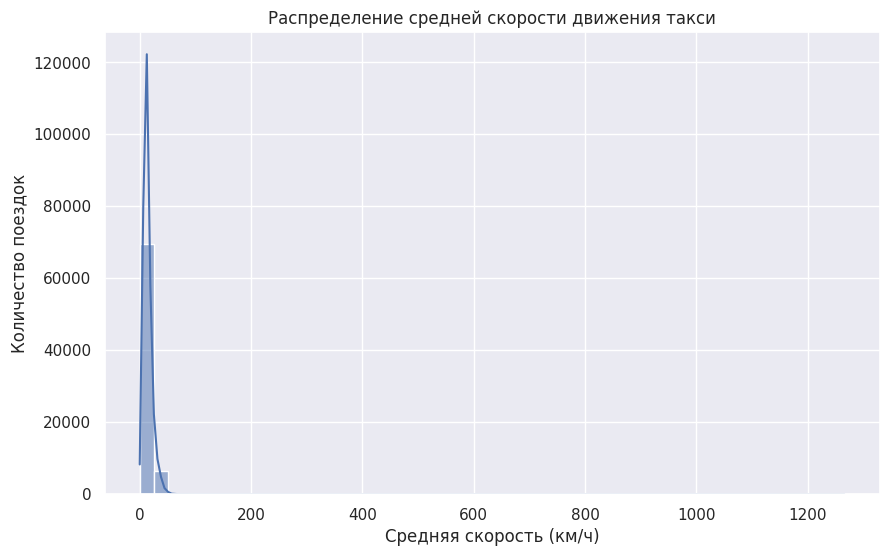

In [ ]:
df['trip_duration'] = np.expm1(df['log_trip_duration'])

df['average_speed'] = df['haversine'] / df['trip_duration'] * 3600

plt.figure(figsize=(10, 6))
sns.histplot(df['average_speed'], bins=50, kde=True)
plt.title('Распределение средней скорости движения такси')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Количество поездок')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

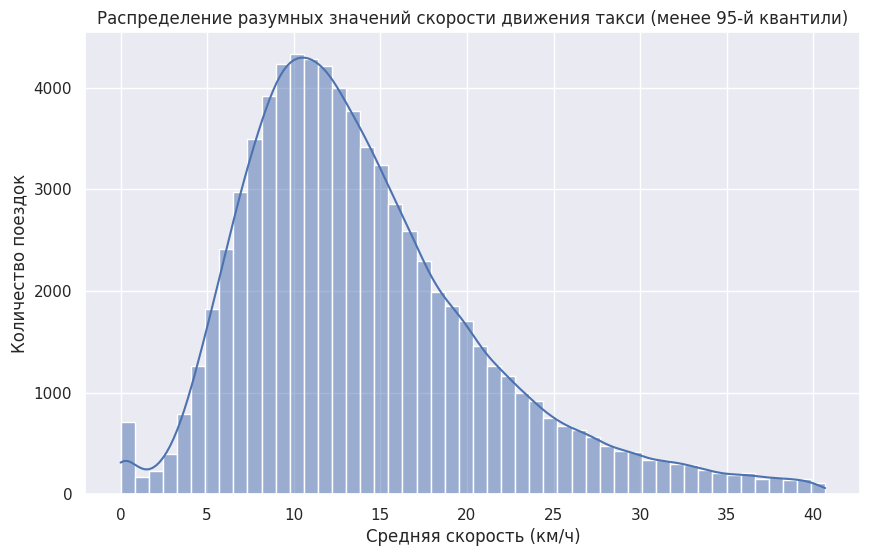

In [ ]:
quantile_value = df['average_speed'].quantile(0.99)

reasonable_speed_df = df[df['average_speed'] <= quantile_value]

plt.figure(figsize=(10, 6))
sns.histplot(reasonable_speed_df['average_speed'], bins=50, kde=True)
plt.title('Распределение разумных значений скорости движения такси (менее 95-й квантили)')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Количество поездок')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

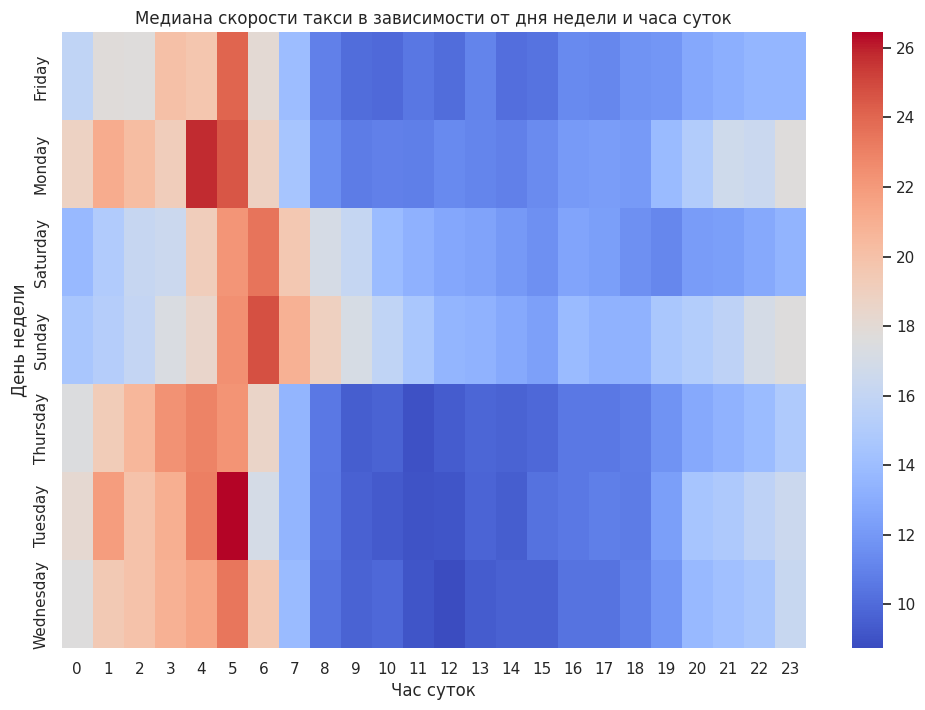

In [ ]:
median_speed = df.groupby(['day_of_week', 'hour'])['average_speed'].median().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(median_speed, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Медиана скорости такси в зависимости от дня недели и часа суток')
plt.xlabel('Час суток')
plt.ylabel('День недели')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [ ]:
df = df.drop(columns=['average_speed'])

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [ ]:
replacement_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['day_of_week'] = df['day_of_week'].replace(replacement_dict)

df['day_of_week'] = df['day_of_week'].astype(int)

df['rush_hour'] = ((df['day_of_week'] < 5) &
                   (df['hour'] >= 1) & (df['hour'] <= 6))

df['free_road'] = ((df['hour'] >= 8) | (df['hour'] <= 19)) | (df['day_of_week'] >= 5)

print(df)

              id  vendor_id     pickup_datetime  passenger_count  \
0      id2875421        2.0 2016-03-14 17:24:55              1.0   
1      id2377394        1.0 2016-06-12 00:43:35              1.0   
2      id3858529        2.0 2016-01-19 11:35:24              1.0   
3      id3504673        2.0 2016-04-06 19:32:31              1.0   
4      id2181028        2.0 2016-03-26 13:30:55              1.0   
...          ...        ...                 ...              ...   
76242  id3623893        1.0 2016-06-30 00:57:50              2.0   
76243  id2025009        1.0 2016-06-24 23:38:55              1.0   
76244  id3864404        1.0 2016-04-13 07:31:56              2.0   
76245  id3811807        1.0 2016-02-06 20:59:11              2.0   
76246  id3985061        2.0 2016-01-20 23:10:51              1.0   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0            -73.982155        40.767937         -73.964630         40.765602   
1            -73.9804

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ...):
        # your code here
        pass

    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        return X

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.